IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M3\FAULT_M3_10


VOLO m3 FAULT 10%

In [3]:
rcou_m3_fault10 = pd.read_csv("RCOU.csv")
rcou_m3_fault10 = rcou_m3_fault10.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m3_fault10 = rcou_m3_fault10[((rcou_m3_fault10['C9'] >= 1400) & (rcou_m3_fault10['C10'] >= 1400) & (rcou_m3_fault10['C11'] >= 1400) & (rcou_m3_fault10['C12'] >= 1400) & (rcou_m3_fault10['C13'] >= 1400) & (rcou_m3_fault10['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m3_fault10)

,TimeUS,C9,C10,C11,C12,C13,C14
518,106891806,1479,1406,1428,1459,1460,1427
519,106907540,1455,1450,1499,1401,1499,1402
523,106952242,1456,1497,1474,1479,1451,1501
526,106984710,1422,1557,1490,1497,1414,1563
527,106995645,1491,1507,1473,1524,1460,1535
...,...,...,...,...,...,...,...
7705,186260603,1491,1520,1547,1462,1459,1550
7706,186270800,1556,1446,1524,1482,1505,1502
7707,186281436,1556,1438,1522,1478,1504,1495
7708,186291822,1552,1431,1521,1467,1504,1485


In [4]:
xkf1_m3_fault10 = pd.read_csv("XKF1_0.csv")
xkf1_m3_fault10 = xkf1_m3_fault10.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m3_fault10 = xkf1_m3_fault10[((xkf1_m3_fault10['TimeUS'] >= 106891806) & (xkf1_m3_fault10['TimeUS'] <= 186302079))]
print(xkf1_m3_fault10)

         TimeUS  Roll  Pitch    Yaw
520   106905542 -0.33   0.35  12.46
521   106918323 -0.39   0.39  12.45
522   106928766 -0.20   0.37  12.46
523   106939536 -0.15   0.37  12.46
524   106950235 -0.17   0.36  12.45
...         ...   ...    ...    ...
7707  186257957 -0.87   1.00   0.92
7708  186268729 -0.89   1.01   0.95
7709  186278947 -0.97   1.00   0.99
7710  186289650 -1.03   0.97   1.00
7711  186299874 -1.02   0.92   1.03

[7192 rows x 4 columns]


In [5]:
att_m3_fault10 = pd.read_csv("ATT.csv")
att_m3_fault10 = att_m3_fault10.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
att_m3_fault10 = att_m3_fault10[((att_m3_fault10['TimeUS'] >= 106891806) & (att_m3_fault10['TimeUS'] <= 186302079))]
print(att_m3_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
520   106906700     0.04 -0.33     -0.01   0.35   12.39  12.46
521   106919694     0.02 -0.39      0.00   0.39   12.39  12.45
522   106930531     0.00 -0.20      0.00   0.37   12.39  12.46
523   106941454     0.00 -0.15      0.00   0.37   12.39  12.46
524   106951490    -0.02 -0.17      0.00   0.36   12.39  12.45
...         ...      ...   ...       ...    ...     ...    ...
7707  186259757     1.18 -0.87     -0.69   1.00    4.83   0.92
7708  186269991     1.25 -0.89     -0.68   1.01    4.83   0.95
7709  186280650     1.31 -0.97     -0.67   1.00    4.83   0.99
7710  186291048     1.36 -1.03     -0.64   0.97    4.83   1.00
7711  186301226     1.39 -1.02     -0.59   0.92    4.83   1.03

[7192 rows x 7 columns]


In [6]:
att_m3_fault10 = pd.merge_asof(att_m3_fault10,xkf1_m3_fault10, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m3_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0     106906700     0.04 -0.33     -0.01   0.35   12.39  12.46
1     106919694     0.02 -0.39      0.00   0.39   12.39  12.45
2     106930531     0.00 -0.20      0.00   0.37   12.39  12.46
3     106941454     0.00 -0.15      0.00   0.37   12.39  12.46
4     106951490    -0.02 -0.17      0.00   0.36   12.39  12.45
...         ...      ...   ...       ...    ...     ...    ...
7187  186259757     1.18 -0.87     -0.69   1.00    4.83   0.92
7188  186269991     1.25 -0.89     -0.68   1.01    4.83   0.95
7189  186280650     1.31 -0.97     -0.67   1.00    4.83   0.99
7190  186291048     1.36 -1.03     -0.64   0.97    4.83   1.00
7191  186301226     1.39 -1.02     -0.59   0.92    4.83   1.03

[7192 rows x 7 columns]


In [7]:
esc_2_m3_fault10 = pd.read_csv("ESC_2.csv")
esc_2_m3_fault10 = esc_2_m3_fault10.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
esc_2_m3_fault10 = esc_2_m3_fault10[((esc_2_m3_fault10['TimeUS'] >= 106891806) & (esc_2_m3_fault10['TimeUS'] <= 186302079))]
print(esc_2_m3_fault10)

        TimeUS   RPM  Curr
50   106956963  4270  2.45
51   107063730  5055  3.34
52   107280242  5634  3.58
53   107385088  6230  3.66
54   107494058  6287  3.91
55   107610038  6326  3.89
56   107710867  6319  4.35
57   107826624  6438  4.20
58   107935489  6592  4.56
59   108044089  6669  4.66
60   108154165  6661  4.45
61   108261680  6692  4.04
62   108479968  6582  3.60
63   108586998  6219  3.77
64   108693104  6377  3.59
65   108808747  6228  3.26
66   108907301  6081  3.31
67   109025072  5887  3.16
68   109141620  5938  3.37
69   109361671  6200  3.69
70   109464076  6221  3.72
71   109571647  6312  3.40
72   109681169  6224  3.40
73   109786982  6085  3.36
74   109896492  6082  3.29
75   109999413  6030  3.74
76   110215011  6134  3.47
77   110331468  6430  3.56
78   110447060  6198  3.53
79   110547236  6188  3.71
80   110656216  6231  3.85
81   110763061  6316  3.79
82   110872739  6483  3.77
83   110980057  6244  3.84
84   111195516  6327  3.40
85   111312221  6273  3.46
8

In [8]:
imu_2_m3_fault10 = pd.read_csv("IMU_2.csv")
imu_2_m3_fault10 = imu_2_m3_fault10.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
imu_2_m3_fault10 = imu_2_m3_fault10[((imu_2_m3_fault10['TimeUS'] >= 106891806) & (imu_2_m3_fault10['TimeUS'] <= 186302079))]
print(imu_2_m3_fault10)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
2061   106893398 -0.181538 -0.083858  0.015945  0.338709  0.538201  -9.890386
2062   106896186 -0.206260 -0.052126  0.009905  0.349124  0.591406  -9.960483
2063   106898723 -0.009462  0.044965 -0.007002  0.346877  0.739314  -9.861938
2064   106902129  0.214731  0.027732 -0.018386  0.314985  0.745321  -9.716557
2065   106904697  0.267047 -0.079066 -0.034859  0.257307  0.660825  -9.680092
...          ...       ...       ...       ...       ...       ...        ...
29394  186290860 -0.068042 -0.066280  0.023124  0.583846  1.092862 -10.782830
29395  186293804  0.018301 -0.103987  0.024436  0.617982  1.217526 -10.874960
29396  186296514  0.119775 -0.107886  0.029726  0.623442  1.229517 -10.930940
29397  186298682  0.088126 -0.105963  0.042768  0.641600  1.321502 -11.139120
29398  186301070  0.025372 -0.119452  0.060226  0.609978  1.467409 -11.271120

[27338 rows x 7 columns]


In [9]:
m3_fault10 = pd.merge_asof(att_m3_fault10, imu_2_m3_fault10, on="TimeUS",  tolerance= 100000)
print(m3_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw      GyrX  \
0     106906700     0.04 -0.33     -0.01   0.35   12.39  12.46 -0.105342   
1     106919694     0.02 -0.39      0.00   0.39   12.39  12.45 -0.295167   
2     106930531     0.00 -0.20      0.00   0.37   12.39  12.46  0.116438   
3     106941454     0.00 -0.15      0.00   0.37   12.39  12.46  0.126498   
4     106951490    -0.02 -0.17      0.00   0.36   12.39  12.45 -0.012492   
...         ...      ...   ...       ...    ...     ...    ...       ...   
7187  186259757     1.18 -0.87     -0.69   1.00    4.83   0.92 -0.099492   
7188  186269991     1.25 -0.89     -0.68   1.01    4.83   0.95 -0.039038   
7189  186280650     1.31 -0.97     -0.67   1.00    4.83   0.99 -0.046706   
7190  186291048     1.36 -1.03     -0.64   0.97    4.83   1.00 -0.068042   
7191  186301226     1.39 -1.02     -0.59   0.92    4.83   1.03  0.025372   

          GyrY      GyrZ      AccX      AccY       AccZ  
0    -0.102818 -0.024055  0.1

In [10]:
m3_fault10 = pd.merge_asof(esc_2_m3_fault10, m3_fault10, on="TimeUS",  tolerance= 100000)
print(m3_fault10)

        TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw    Yaw  \
0    106956963  4270  2.45    -0.02  -0.17      0.00   0.36   12.39  12.45   
1    107063730  5055  3.34     0.00  -0.17      0.07   0.22   12.39  12.66   
2    107280242  5634  3.58    -0.04   0.51      0.20  -0.48   12.39  14.06   
3    107385088  6230  3.66    -0.33   0.68      0.36  -0.48   12.39  15.54   
4    107494058  6287  3.91    -0.83   0.62      0.78  -0.77   12.38  17.47   
5    107610038  6326  3.89    -1.96   1.37      1.25  -0.54   12.37  19.35   
6    107710867  6319  4.35    -2.88   1.13      1.70  -0.40   12.35  20.75   
7    107826624  6438  4.20    -3.84  -0.02      2.32  -0.13   11.91  21.84   
8    107935489  6592  4.56    -4.59  -1.50      2.72   0.56   10.82  22.24   
9    108044089  6669  4.66    -5.17  -2.65      2.86   1.46    8.36  21.83   
10   108154165  6661  4.45    -5.47  -3.19      2.83   2.15    6.61  20.47   
11   108261680  6692  4.04    -5.52  -3.53      2.87   2.52    6

In [11]:
m3_fault10["TimeUS"] = m3_fault10["TimeUS"] - m3_fault10.iloc[0]["TimeUS"]
m3_fault10["TimeUS"] = m3_fault10["TimeUS"].astype(int)
m3_fault10["Guasto"] = 2
print(m3_fault10)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw    Yaw  \
0           0  4270  2.45    -0.02  -0.17      0.00   0.36   12.39  12.45   
1      106767  5055  3.34     0.00  -0.17      0.07   0.22   12.39  12.66   
2      323279  5634  3.58    -0.04   0.51      0.20  -0.48   12.39  14.06   
3      428125  6230  3.66    -0.33   0.68      0.36  -0.48   12.39  15.54   
4      537095  6287  3.91    -0.83   0.62      0.78  -0.77   12.38  17.47   
5      653075  6326  3.89    -1.96   1.37      1.25  -0.54   12.37  19.35   
6      753904  6319  4.35    -2.88   1.13      1.70  -0.40   12.35  20.75   
7      869661  6438  4.20    -3.84  -0.02      2.32  -0.13   11.91  21.84   
8      978526  6592  4.56    -4.59  -1.50      2.72   0.56   10.82  22.24   
9     1087126  6669  4.66    -5.17  -2.65      2.86   1.46    8.36  21.83   
10    1197202  6661  4.45    -5.47  -3.19      2.83   2.15    6.61  20.47   
11    1304717  6692  4.04    -5.52  -3.53      2.87   2.52    6.45  18.78   

In [12]:
path_file = path_file.replace(r"M3\FAULT_M3_10", "")
os.chdir(path_file)
m3_fault10.to_csv('m3_fault10.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


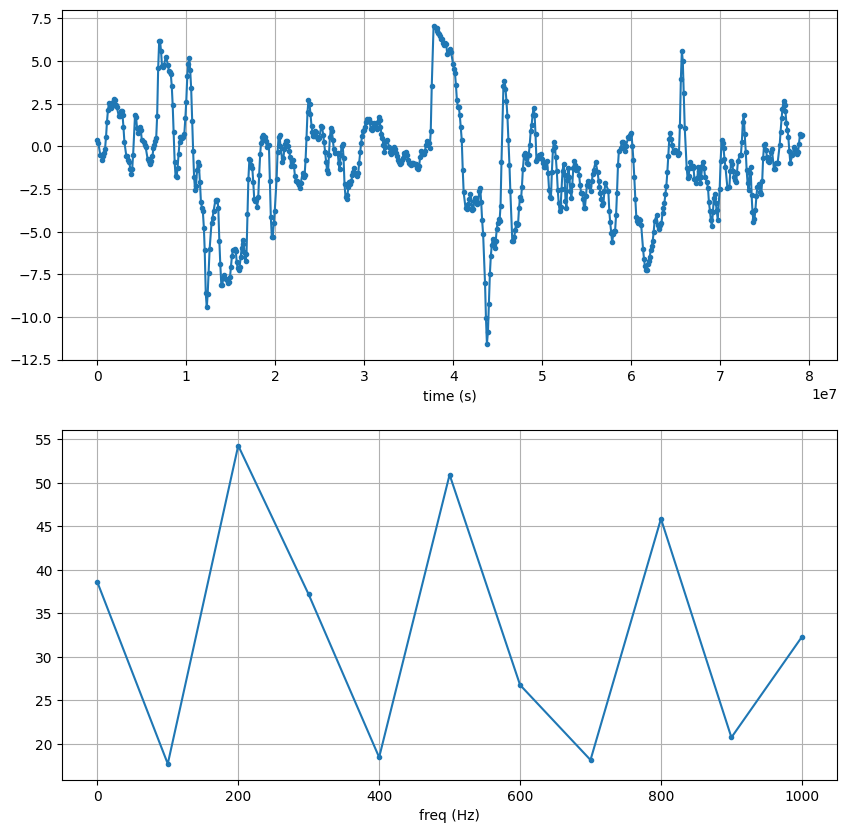

In [13]:
t = m3_fault10["TimeUS"]
y = m3_fault10["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

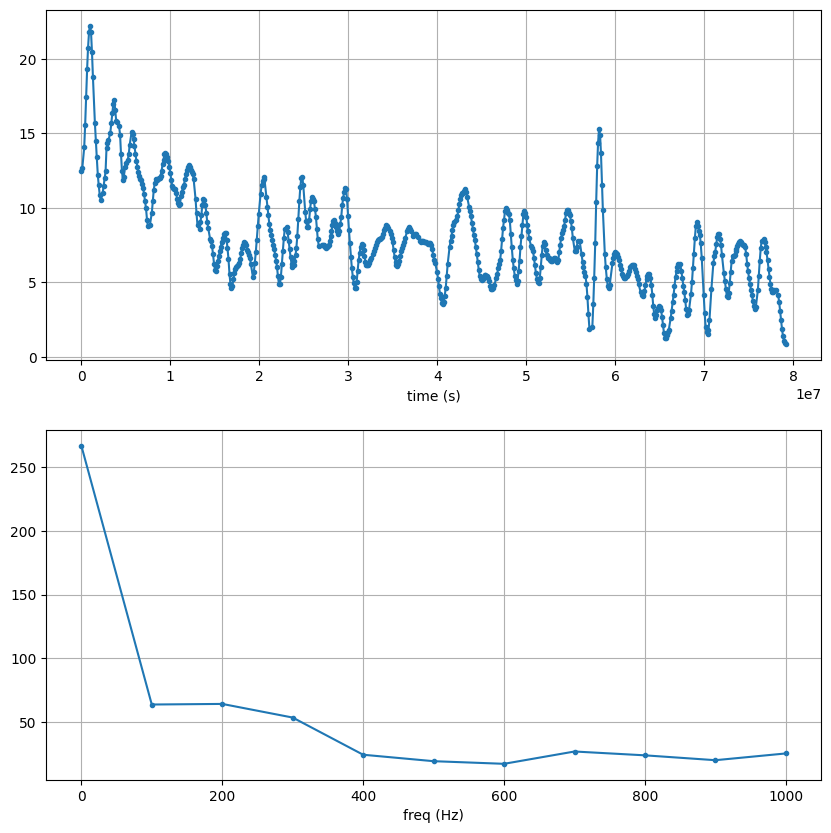

In [14]:
t = m3_fault10["TimeUS"]
y = m3_fault10["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

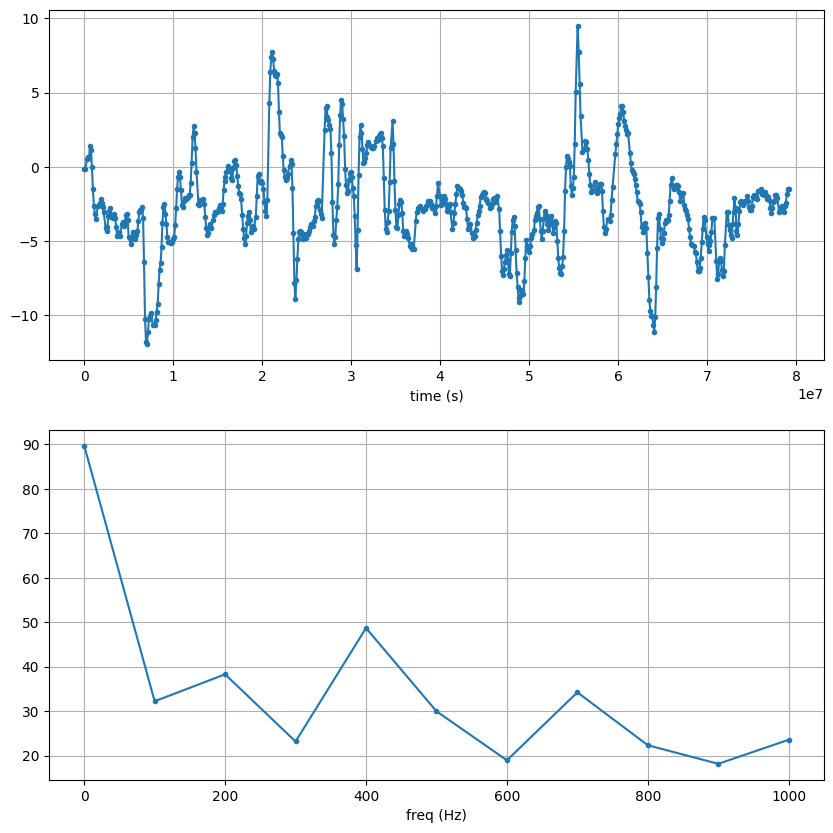

In [15]:
t = m3_fault10["TimeUS"]
y = m3_fault10["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

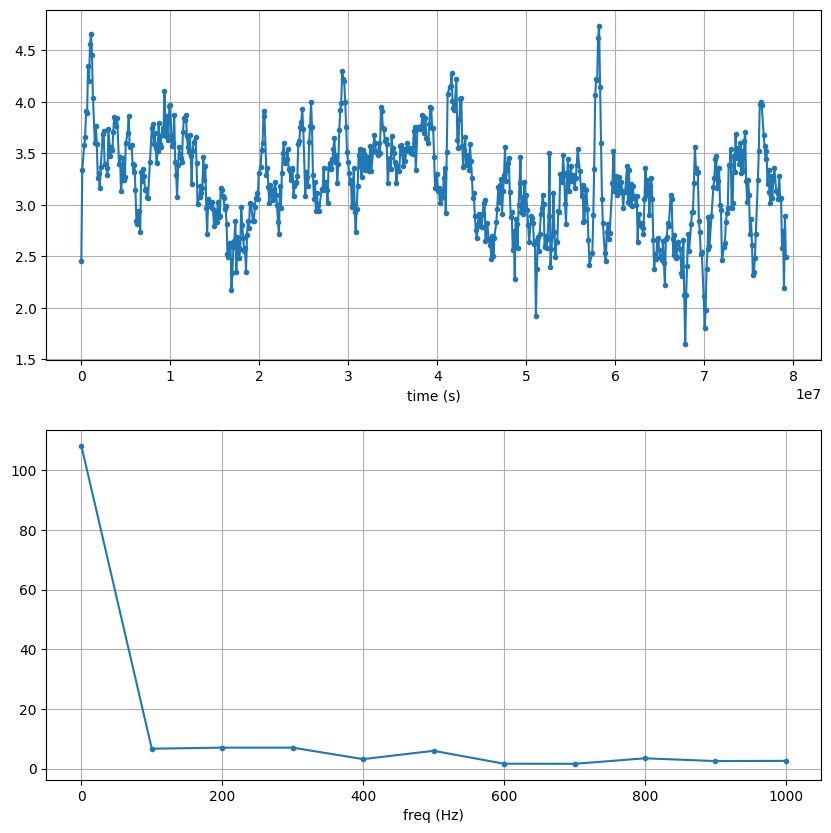

In [16]:
t = m3_fault10["TimeUS"]
y = m3_fault10["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

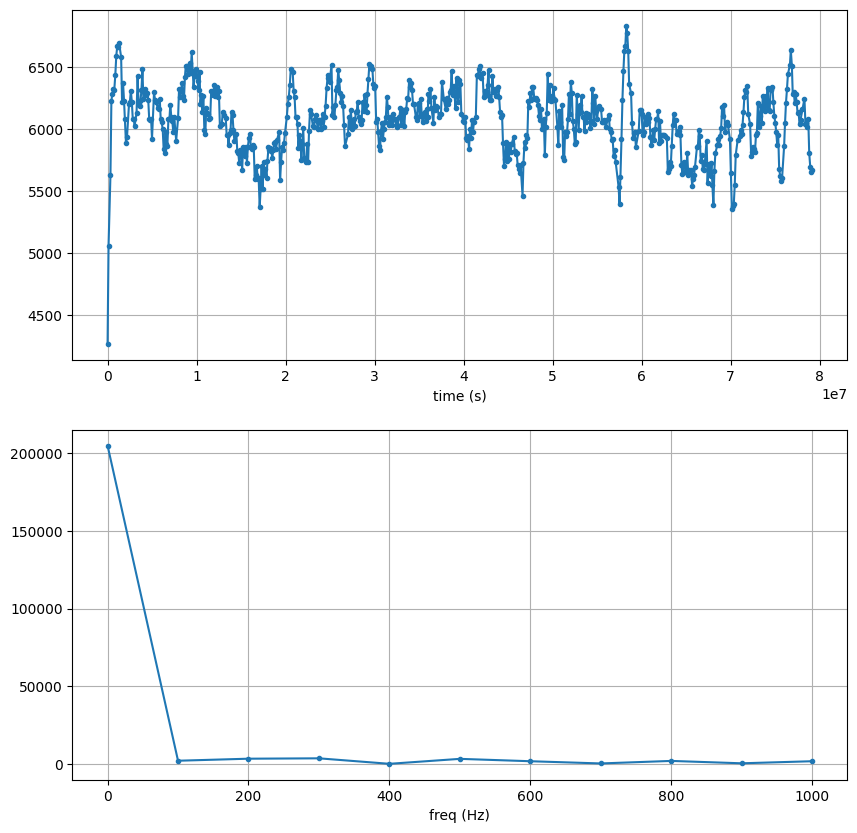

In [17]:
t = m3_fault10["TimeUS"]
y = m3_fault10["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

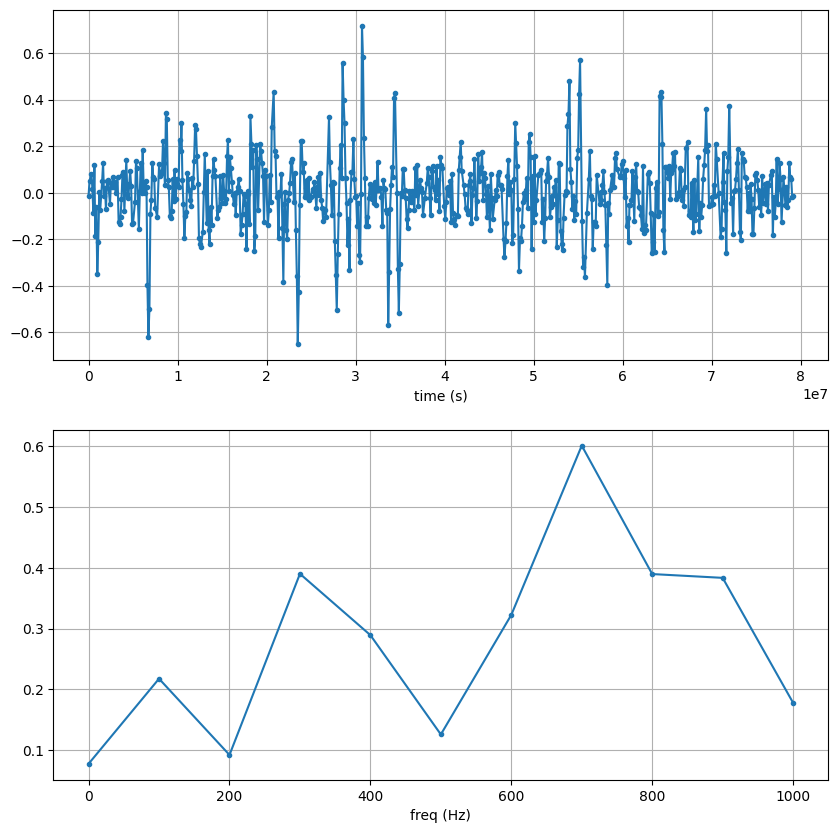

In [18]:
t = m3_fault10["TimeUS"]
y = m3_fault10["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

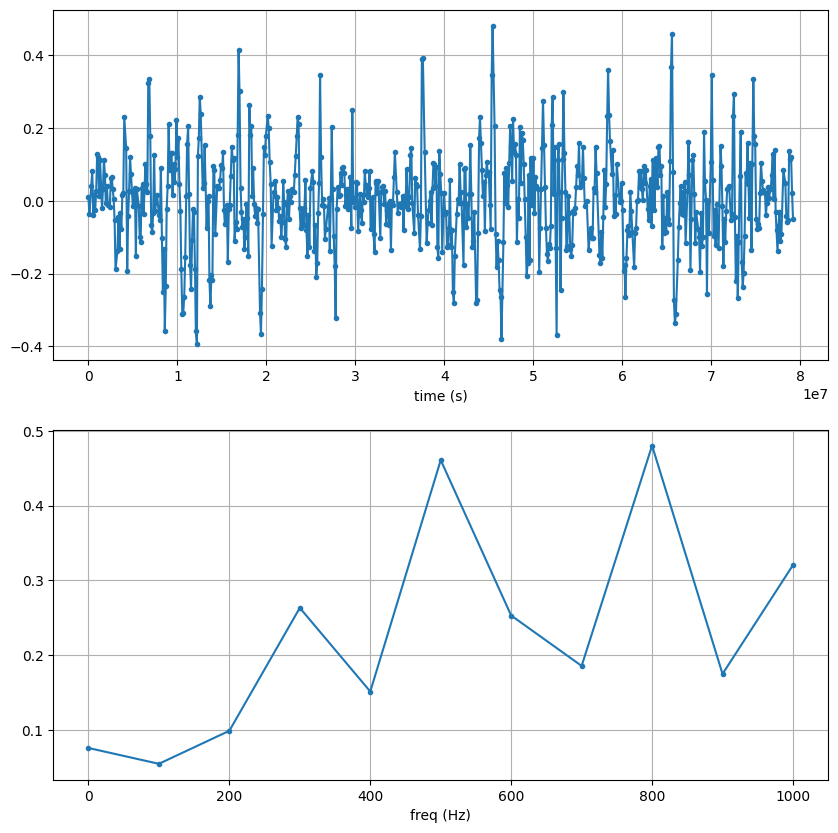

In [19]:
t = m3_fault10["TimeUS"]
y = m3_fault10["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

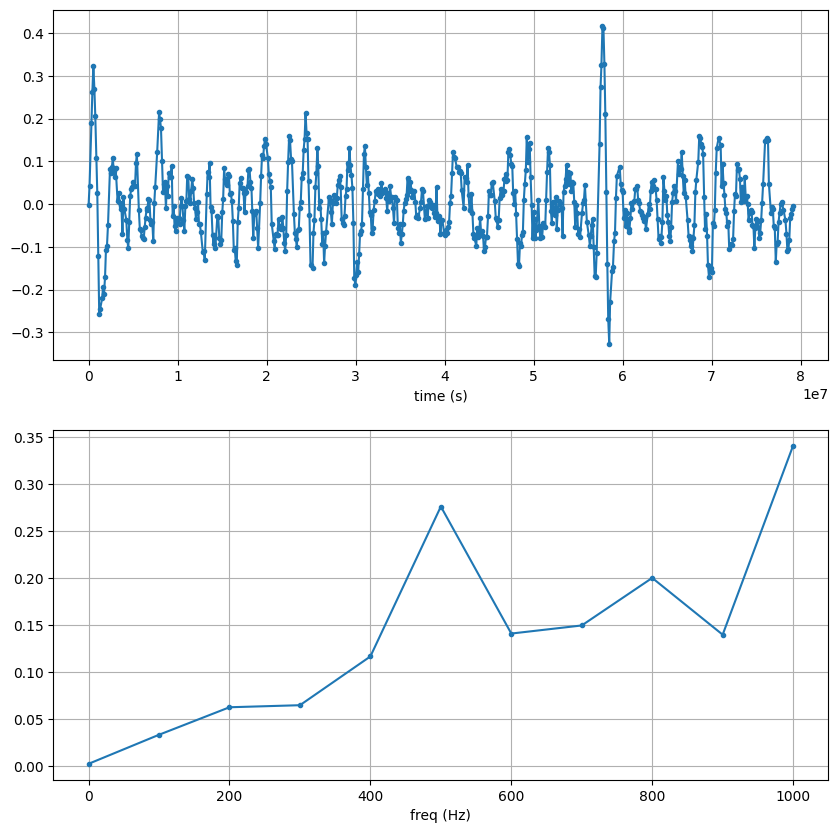

In [20]:
t = m3_fault10["TimeUS"]
y = m3_fault10["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

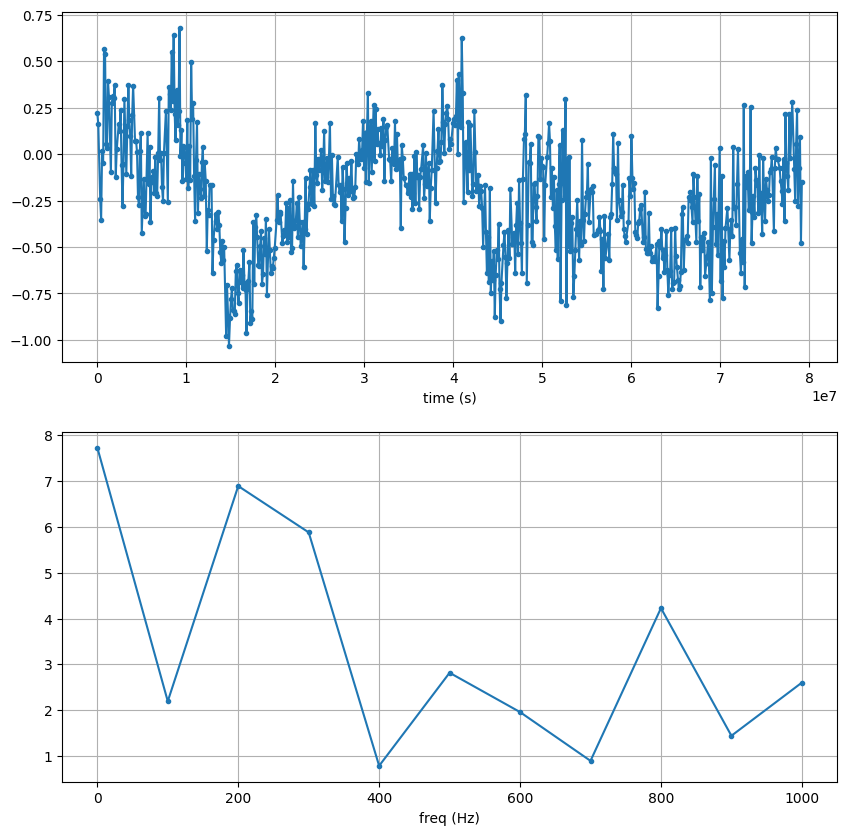

In [21]:
t = m3_fault10["TimeUS"]
y = m3_fault10["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

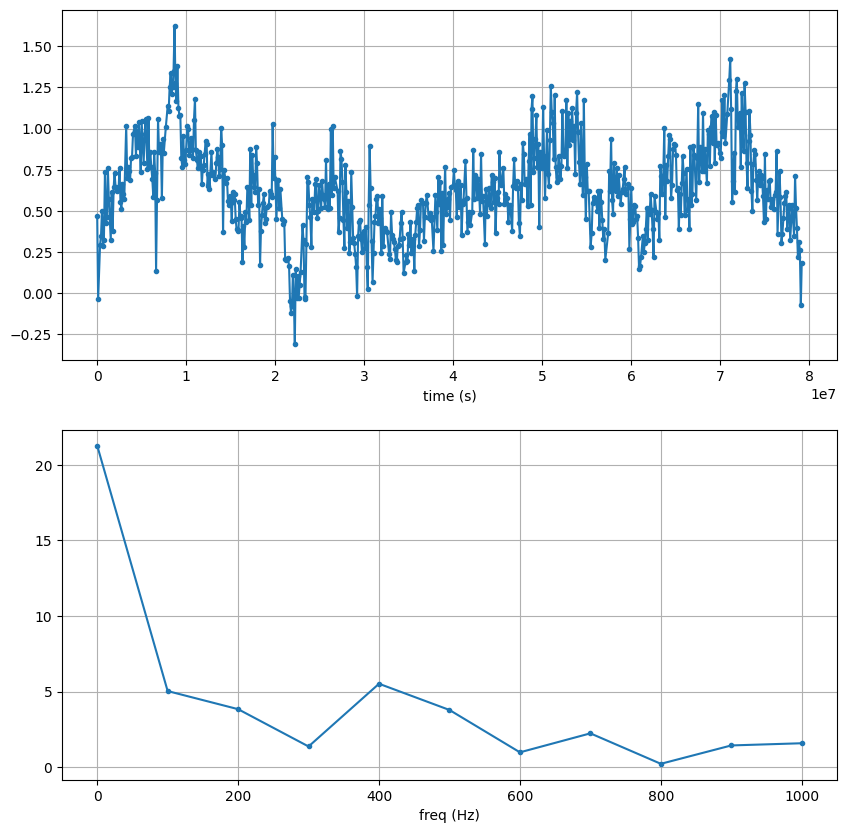

In [22]:
t = m3_fault10["TimeUS"]
y = m3_fault10["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

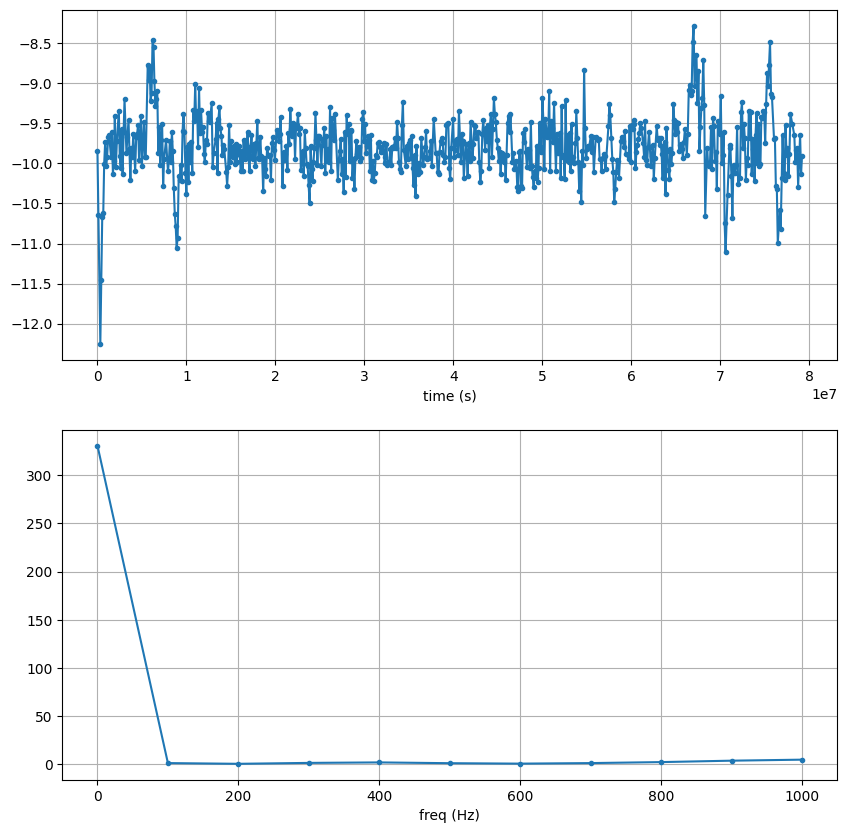

In [23]:
t = m3_fault10["TimeUS"]
y = m3_fault10["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()